In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

breast_cancer_data = pd.read_csv("Breastcancer.csv")


print(breast_cancer_data.head(5))
print(breast_cancer_data.describe())
print(breast_cancer_data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

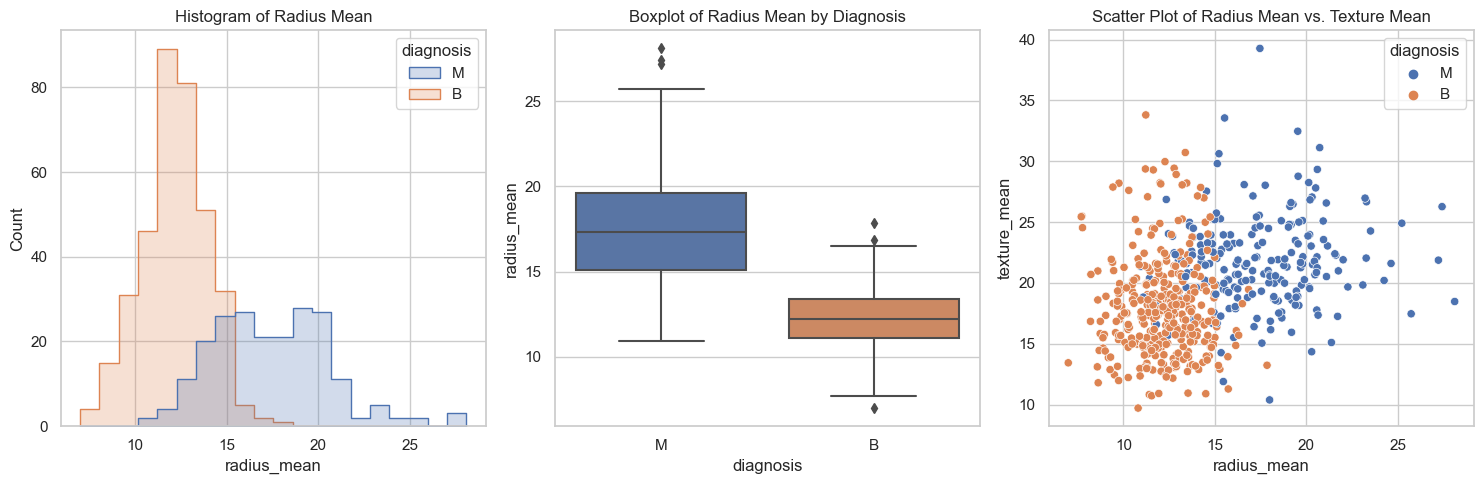

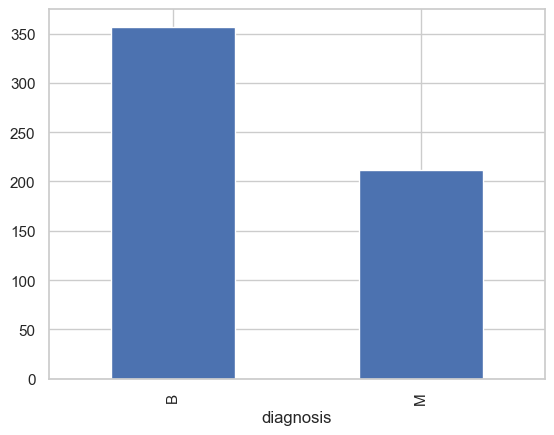

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the unnecessary column
breast_cancer_data.drop(columns=['Unnamed: 32'], inplace=True)

# Setting up the plot environment
sns.set(style="whitegrid")

# 1. Histograms for the 'radius_mean'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(breast_cancer_data, x='radius_mean', hue='diagnosis', element='step', bins=20)
plt.title('Histogram of Radius Mean')

# 2. Boxplot for the 'radius_mean' split by diagnosis
plt.subplot(1, 3, 2)
sns.boxplot(data=breast_cancer_data, x='diagnosis', y='radius_mean')
plt.title('Boxplot of Radius Mean by Diagnosis')

# 3. Scatter plot of 'radius_mean' vs 'texture_mean' colored by diagnosis
plt.subplot(1, 3, 3)
sns.scatterplot(data=breast_cancer_data, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Scatter Plot of Radius Mean vs. Texture Mean')

plt.tight_layout()
plt.show()

breast_cancer_data.diagnosis.value_counts().plot.bar()
plt.show()




In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


# Prepare the data
X = breast_cancer_data.drop(columns=['id', 'diagnosis'])
y = breast_cancer_data['diagnosis']


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Transform 'M' and 'B' in the 'diagnosis' column to 0 and 1
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets (70% train, 30% test)
X_train_enconded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=123)


#========================================================================


# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

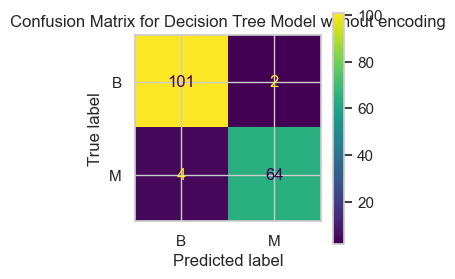

0.9649122807017544

Using enconding:
0.9649122807017544


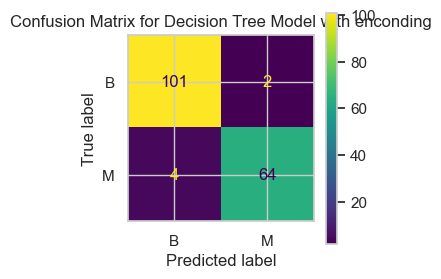

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Confusion matrix
# Display confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_)
plt.title('Confusion Matrix for Decision Tree Model without encoding')
plt.gcf().set_size_inches(3, 3)  # Using a different approach to set the size directly
plt.show()

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print( accuracy)

#==============================================

# Initialize and train the Decision Tree Classifier with encoded labels
dt_classifier_encoded = DecisionTreeClassifier(random_state=42)
dt_classifier_encoded.fit(X_train_enconded, y_train_encoded)

# Predictions on the test set
y_pred_encoded = dt_classifier_encoded.predict(X_test_encoded)

# Display model accuracy using the encoded labels
encoded_accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("\nUsing enconding:")
print(encoded_accuracy)

# Display confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_encoded, display_labels=label_encoder.classes_)
plt.title('Confusion Matrix for Decision Tree Model with enconding')
plt.gcf().set_size_inches(3, 3)  # Using a different approach to set the size directly
plt.show()





Taxa de Acerto
A taxa de acerto do modelo é de aproximadamente 96.49%.

A matriz de confusão mostra que:

- 101 tumores benignos foram corretamente classificados como benignos (verdadeiros positivos).
- 64 tumores malignos foram corretamente classificados como malignos (verdadeiros negativos).
- 2 tumores benignos foram incorretamente classificados como malignos (falsos positivos).
- 4 tumores malignos foram incorretamente classificados como benignos (falsos negativos).


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the list to store accuracy scores
accuracy_scores = []

# Repeat the process 10 times
for _ in range(10):
    # Split the data into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    
    # Initialize and train the Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=None)
    dt_classifier.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = dt_classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracy_scores)
std_deviation = np.std(accuracy_scores)

mean_accuracy, std_deviation


(0.9222222222222222, 0.015918897764697303)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def evaluate_model(y_true, y_pred):
    # Matriz de confusão
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Matriz de Confusão:")
    print(conf_matrix)
    
    # Taxa de acerto (Accuracy)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Recall
    recall = recall_score(y_true, y_pred, pos_label='M')  # Considerando 'M' como a classe positiva
    print(f"Recall: {recall:.4f}")
    
    # Precision
    precision = precision_score(y_true, y_pred, pos_label='M')  # Considerando 'M' como a classe positiva
    print(f"Precision: {precision:.4f}")
    
    # F1 Score
    f1 = f1_score(y_true, y_pred, pos_label='M')  # Considerando 'M' como a classe positiva
    print(f"F1 Score: {f1:.4f}")

# Exemplo de uso:
# Suponha que y_test e y_pred sejam os rótulos verdadeiros e os rótulos preditos, respectivamente
# evaluate_model(y_test, y_pred)


Matriz de Confusão:


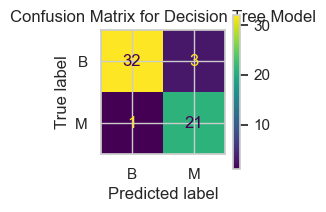

Accuracy: 0.9298
Recall: 0.9545
Precision: 0.8750
F1 Score: 0.9130

--------------------------------------------------

Matriz de Confusão:


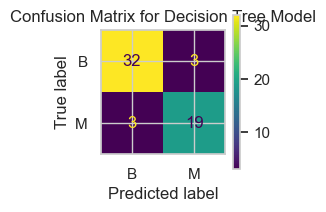

Accuracy: 0.8947
Recall: 0.8636
Precision: 0.8636
F1 Score: 0.8636

--------------------------------------------------

Matriz de Confusão:


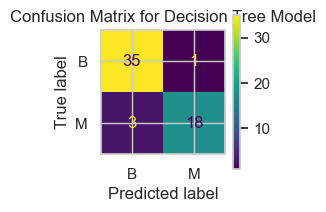

Accuracy: 0.9298
Recall: 0.8571
Precision: 0.9474
F1 Score: 0.9000

--------------------------------------------------

Matriz de Confusão:


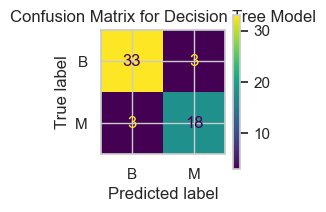

Accuracy: 0.8947
Recall: 0.8571
Precision: 0.8571
F1 Score: 0.8571

--------------------------------------------------

Matriz de Confusão:


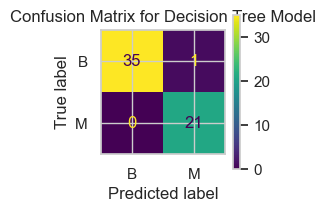

Accuracy: 0.9825
Recall: 1.0000
Precision: 0.9545
F1 Score: 0.9767

--------------------------------------------------

Matriz de Confusão:


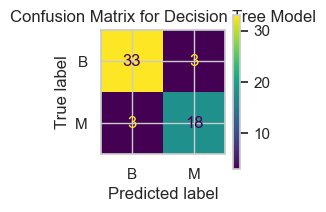

Accuracy: 0.8947
Recall: 0.8571
Precision: 0.8571
F1 Score: 0.8571

--------------------------------------------------

Matriz de Confusão:


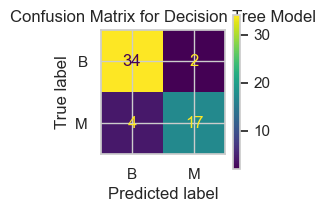

Accuracy: 0.8947
Recall: 0.8095
Precision: 0.8947
F1 Score: 0.8500

--------------------------------------------------

Matriz de Confusão:


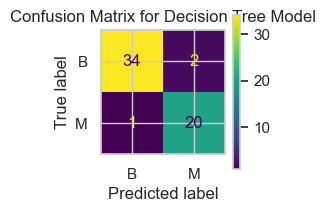

Accuracy: 0.9474
Recall: 0.9524
Precision: 0.9091
F1 Score: 0.9302

--------------------------------------------------

Matriz de Confusão:


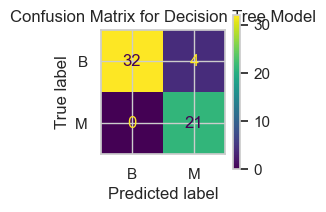

Accuracy: 0.9298
Recall: 1.0000
Precision: 0.8400
F1 Score: 0.9130

--------------------------------------------------

Matriz de Confusão:


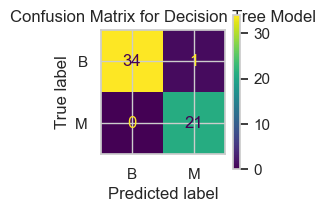

Accuracy: 0.9821
Recall: 1.0000
Precision: 0.9545
F1 Score: 0.9767

--------------------------------------------------

Average Metrics Across All Folds:
Average Accuracy: 0.9280
Average Recall: 0.9152
Average Precision: 0.8953
Average F1 Score: 0.9038


In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Function to evaluate the model and print evaluation metrics
def evaluate_model(y_true, y_pred):
    print("Matriz de Confusão:")
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_)
    plt.gcf().set_size_inches(2, 2)  # Using a different approach to set the size directly
    plt.title('Confusion Matrix for Decision Tree Model')
    plt.show()
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label='M'):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label='M'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, pos_label='M'):.4f}")
    print("\n" + "-"*50 + "\n")

# Initialize StratifiedKFold for k-fold cross-validation
k_fold = StratifiedKFold(n_splits=10)

# Initialize lists to store the evaluation metrics for each fold
accuracies = []
recalls = []
precisions = []
f1_scores = []

# Perform k-fold cross-validation
for train_index, test_index in k_fold.split(X, y):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = dt_classifier.predict(X_test)
    
    # Evaluate the model
    evaluate_model(y_test, y_pred)

    # Store the scores
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, pos_label='M'))
    precisions.append(precision_score(y_test, y_pred, pos_label='M'))
    f1_scores.append(f1_score(y_test, y_pred, pos_label='M'))
    

# Display average metrics across all folds
print("Average Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")



In [8]:
# Calculate the mean and standard deviation of the collected metrics
mean_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

mean_recall = np.mean(recalls)
std_dev_recall = np.std(recalls)

mean_precision = np.mean(precisions)
std_dev_precision = np.std(precisions)

mean_f1_score = np.mean(f1_scores)
std_dev_f1_score = np.std(f1_scores)

(mean_accuracy, std_dev_accuracy), (mean_recall, std_dev_recall), (mean_precision, std_dev_precision), (mean_f1_score, std_dev_f1_score)

# Display the mean and standard deviation of the evaluation metrics in a readable format
print_output = [
    f"Accuracy: Mean = {mean_accuracy:.2%}, Standard Deviation = {std_dev_accuracy:.2%}",
    f"Recall: Mean = {mean_recall:.2%}, Standard Deviation = {std_dev_recall:.2%}",
    f"Precision: Mean = {mean_precision:.2%}, Standard Deviation = {std_dev_precision:.2%}",
    f"F1 Score: Mean = {mean_f1_score:.2%}, Standard Deviation = {std_dev_f1_score:.2%}"
]

print_output


['Accuracy: Mean = 92.80%, Standard Deviation = 3.27%',
 'Recall: Mean = 91.52%, Standard Deviation = 6.96%',
 'Precision: Mean = 89.53%, Standard Deviation = 4.16%',
 'F1 Score: Mean = 90.38%, Standard Deviation = 4.52%']